In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt

#adapted from textbook and class notes

class Random:
    """A random number generator class"""
    
    #initialization method for Random class
    def __init__(self,seed=5555):
        self.seed = seed
        self.m_v = np.uint64(4101842887655102017)
        self.m_w = np.uint64(1)
        self.m_u = np.uint64(1)
        
        self.m_u = np.uint(self.seed) ^ self.m_v
        self.int64()
        self.m_v = self.m_u
        self.int64()
        self.m_w = self.m_v
        self.int64()
        
    #function returns a random 64 bit integer
    def int64(self):
        self.m_u = np.uint64(self.m_u * 2862933555777941757) + np.uint64(7046029254386353087)
        self.m_v ^= self.m_v >> np.uint64(17)
        self.m_v ^= self.m_v << np.uint64(31)
        self.m_v ^= self.m_v >> np.uint64(8)
        self.m_w = np.uint64(np.uint64(4294957665)*(self.m_w & np.uint64(0xffffffff))) + np.uint64((self.m_w >> np.uint64(32)))
        x = np.uint64(self.m_u ^ (self.m_u << np.uint64(21)))
        x ^= x >> np.uint64(35)
        x ^= x << np.uint64(4)
        with np.errstate(over='ignore'):
            return (x + self.m_v)^self.m_w
        
#main function for this python code

if __name__ == "__main__":
    #if the user includes the flag -h or --help, print the options
    if '-h' in sys.argv or '--help' in sys.argv:
        print("Usage: %s [-seed number]" % sys.argv[0])
        print
        sys.exit(1)
            
    #default seed
    seed = 5555
    
    if '-seed' in sys.argv:
        p = sys.argv.index('-seed')
        seed = sys.argv[p+1]
     
    
#can use either/or of the following two options to generate a random seed

    #set random seed for numpy
    np.random.seed(seed)
    
    #class instance of our Random class using seed
    random = Random(seed)
    
#create some random data
    N = 10000
    
    #an array of random numbers from numpy
    x = np.random.rand(N)    
        
    #an array of random numbers using our Random class
    myx = []
    for i in range(0,N):
        myx.append(np.random.rand())
    
    #create histogram of data
    n,bins,patches = plt.hist(myx,50,density=True,facecolor='g',alpha=0.75)
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.title('Uniform Random Number',fontsize=14)
    plt.grid()
        
    plt.show()

------------------

In [58]:
import numpy as np
import csv
from matplotlib import pyplot as plt
import sys

if __name__ == "__main__":
    if '-h' in sys.argv or '--help' in sys.argv:
        print("Usage: %s [-seed number]" % sys.argv[0])
        print
        sys.exit(1)
            
    #default seed
    seed = 5555
    
    if '-seed' in sys.argv:
        p = sys.argv.index('-seed')
        seed = sys.argv[p+1]
    
    np.random.seed(seed)
    N = 10000
    arr = np.random.rand(N)

    with open('github/PHSX815_Week1/random_list.csv','w') as f:
        writer = csv.writer(f,delimiter=',')
        writer.writerow(arr)
        
        #for item in arr:
            #f.write(str(item))
        f.close()

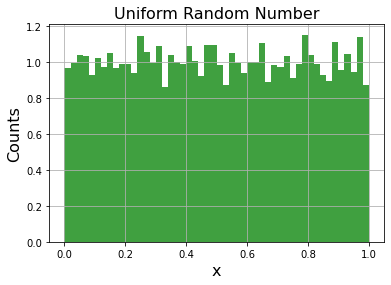

In [88]:
#open csv file, convert each delimited string into a float, append to list

list = []
with open('github/PHSX815_Week1/random_list.csv','r') as f:
    reader = csv.reader(f,delimiter=',')
    for row in reader:
        for i in range(0,N):
            num = float(row[i])
            list.append(num)
            
n,bins,patches = plt.hist(list,50,density=True,facecolor='g',alpha=0.75)
plt.xlabel('x',fontsize=16)
plt.ylabel('Counts',fontsize=16)
plt.title('Uniform Random Number',fontsize=16)
plt.grid()
        
plt.show()